In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 4.1 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=631c8804e3c4321da6838f8c1cdc45087fb1227b56f19b36038206b2fa92b901
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 4.2 MB/s 


## Import Libraries

In [72]:
import os
from datetime import datetime
import pickle

import logging
import warnings
warnings.filterwarnings("ignore")

_ABSOLUTE_DIR = os.getcwd()
_NOTEBOOK_START = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

import seaborn as sns
import matplotlib.pyplot as plt

import shap
import lime

import pandas as pd
import numpy as np

from scipy import stats

from sklearn.svm import LinearSVC

from xgboost import XGBClassifier

## Import Models

In [94]:
from google.colab import files
uploaded = files.upload()

Saving xgboost_best_2 (2).pickle to xgboost_best_2 (2).pickle
Saving best_linear_svm_1 (2).pickle to best_linear_svm_1 (2).pickle


In [95]:
with open('best_linear_svm_1 (2).pickle', 'rb') as pickle_file:
    SVC_model_1 = pickle.load(pickle_file)

with open('xgboost_best_2 (2).pickle', 'rb') as pickle_file:
    XGBoost_model_1 = pickle.load(pickle_file)

In [76]:
from google.colab import files
uploaded = files.upload()

Saving airline_test__processed.csv to airline_test__processed (1).csv
Saving airline_train__processed.csv to airline_train__processed (1).csv


In [121]:
train_data = pd.read_csv('airline_train__processed.csv')
test_data = pd.read_csv('airline_test__processed.csv')

## Last Transformation of the data

In [101]:
train_data.dtypes

Unnamed: 0                             int64
Unnamed: 0.1                           int64
Gender                                  bool
Customer Type                           bool
Age                                    int64
Type of Travel                          bool
Flight Distance                      float64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes           float64
Arrival De

In [122]:
bool_types= ['Gender', 'Customer Type', 'Type of Travel', 'satisfaction']
for i in bool_types:
  train_data[i] = train_data[i].map({True:1, False:0})
  test_data[i] = test_data[i].map({True:1, False:0})


In [123]:
train_data = train_data.loc[ : , train_data.columns != 'satisfaction']
test_data = test_data.loc[:,test_data.columns != 'satisfaction']
train_data = train_data.loc[ : , train_data.columns != 'Unnamed: 0']
train_data = train_data.loc[ : , train_data.columns != 'Unnamed: 0.1']
test_data = test_data.loc[:,test_data.columns != 'Unnamed: 0.1']
test_data = test_data.loc[:,test_data.columns != 'Unnamed: 0']

In [126]:
train_data = train_data.sample(500, random_state = 123)
test_data = test_data.sample(500, random_state = 123)

In [124]:
train_data_2 = train_data.sample(700, random_state = 122)
test_data_2 = test_data.sample(700, random_state = 122)

In [125]:
train_data_3 = train_data.sample(500, random_state = 0)
test_data_3 = test_data.sample(500, random_state = 0)

## SHAP

### Support Vector Machine

In [105]:
explainer_LinearSVC = shap.Explainer(SVC_model_1.predict, train_data)
shap_values_LinearSVC = explainer_LinearSVC(test_data)

Permutation explainer: 501it [02:46,  2.86it/s]


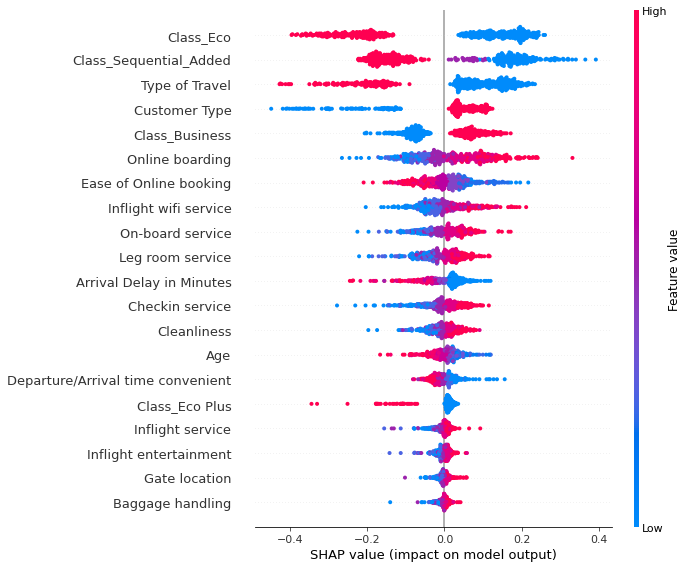

In [106]:
shap.summary_plot(shap_values_LinearSVC.values, test_data, feature_names = train_data.columns)

### Gradient Boost

In [107]:
explainer_XGB = shap.Explainer(XGBoost_model_1.predict,train_data)
shap_values_XGB = explainer_XGB(test_data)



Permutation explainer: 501it [02:13,  3.47it/s]


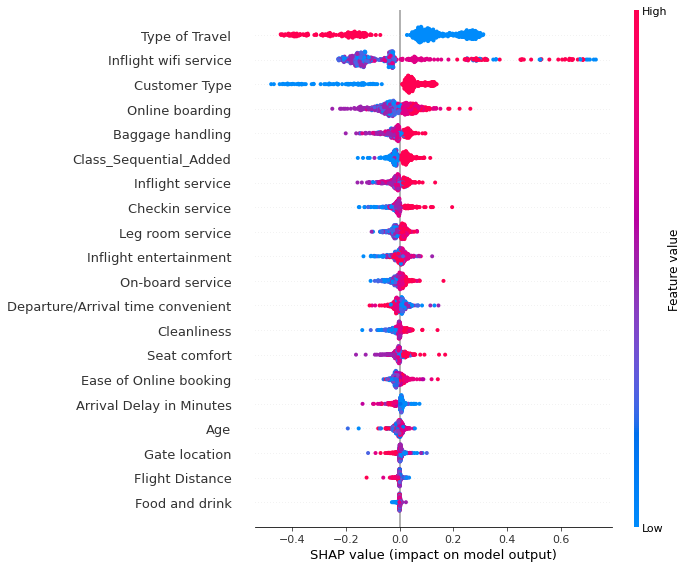

In [108]:
shap.summary_plot(shap_values_XGB.values, test_data)

## Are there significant differences?

In [109]:
transposed_LinearSVC_shap= shap_values_LinearSVC.values.T
transposed_XGB_shap = shap_values_XGB.values.T

Feature Gender


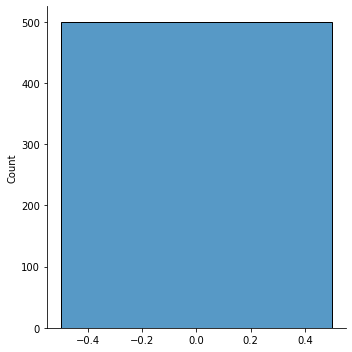

Feature Customer Type


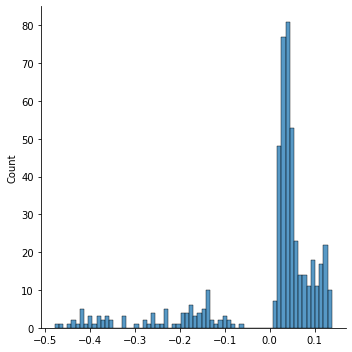

Feature Age


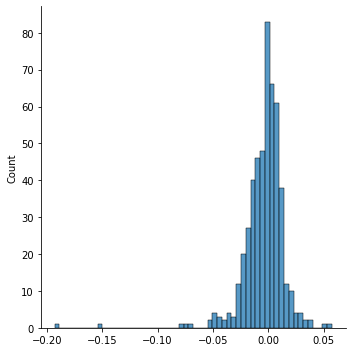

Feature Type of Travel


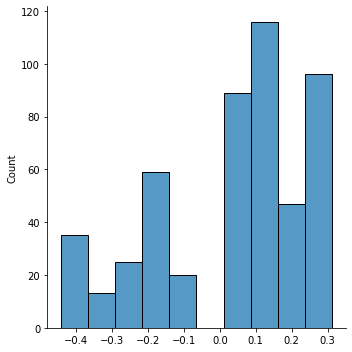

Feature Flight Distance


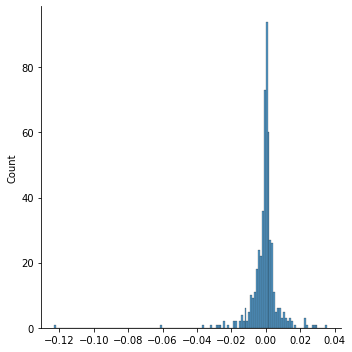

Feature Inflight wifi service


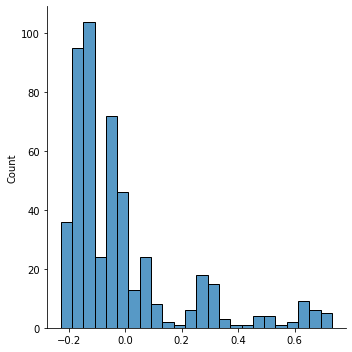

Feature Departure/Arrival time convenient


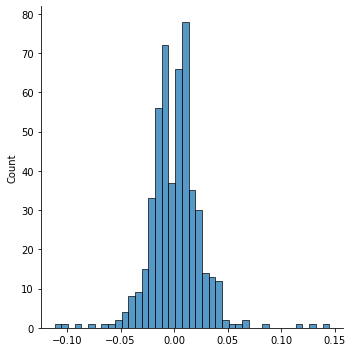

Feature Ease of Online booking


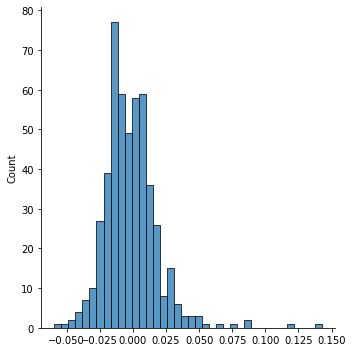

Feature Gate location


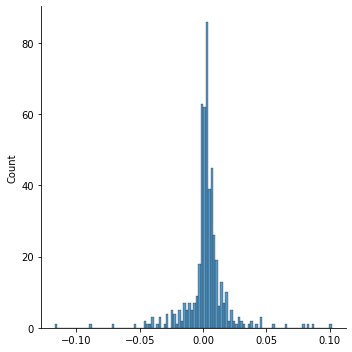

Feature Food and drink


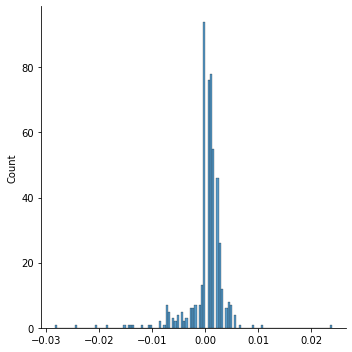

Feature Online boarding


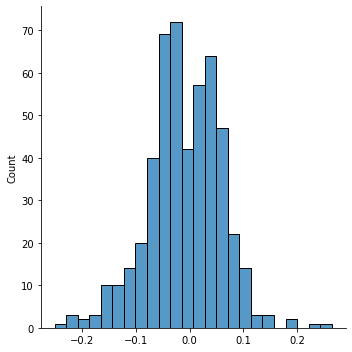

Feature Seat comfort


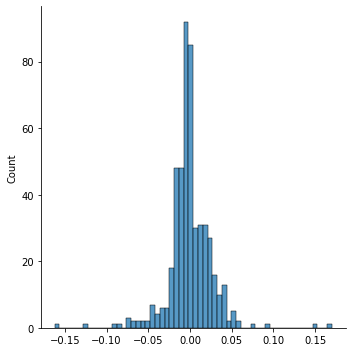

Feature Inflight entertainment


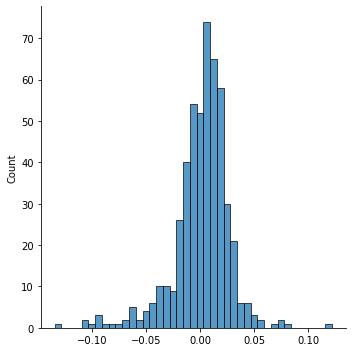

Feature On-board service


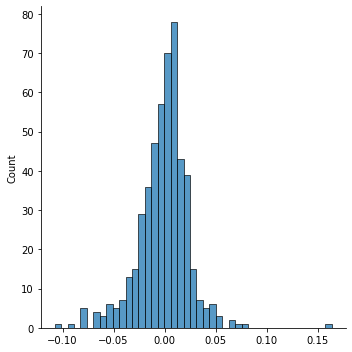

Feature Leg room service


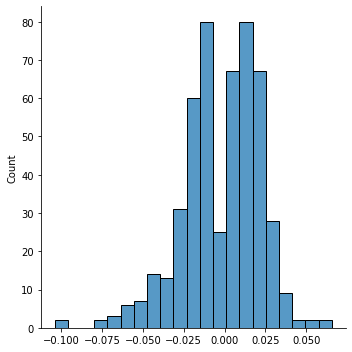

Feature Baggage handling


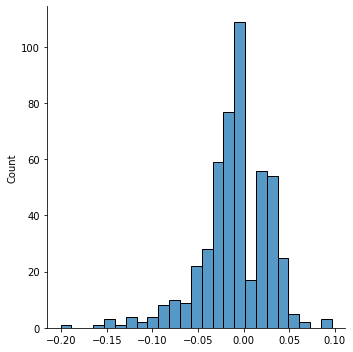

Feature Checkin service


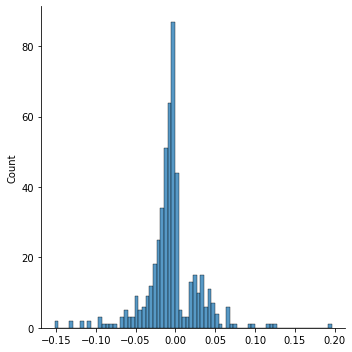

Feature Inflight service


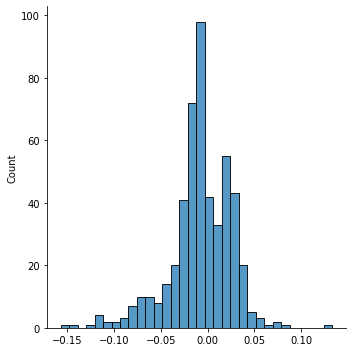

Feature Cleanliness


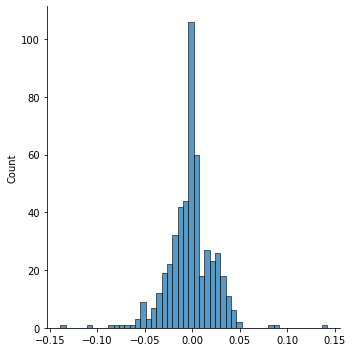

Feature Departure Delay in Minutes


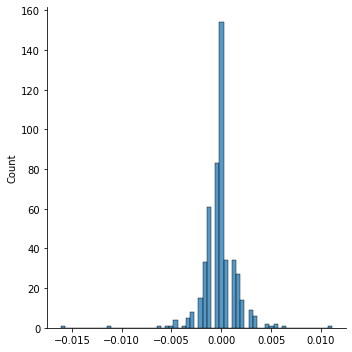

Feature Arrival Delay in Minutes


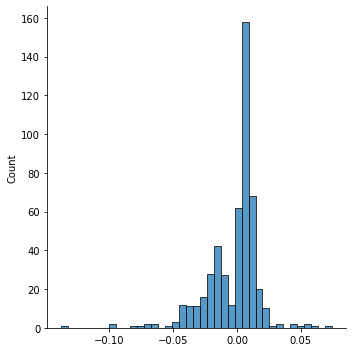

Feature Class_Sequential_Added


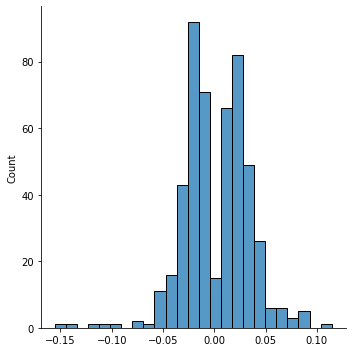

Feature Class_Business


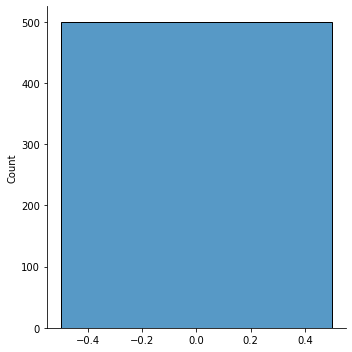

Feature Class_Eco


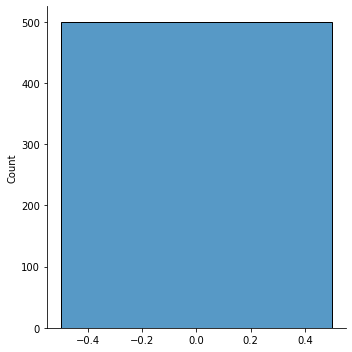

Feature Class_Eco Plus


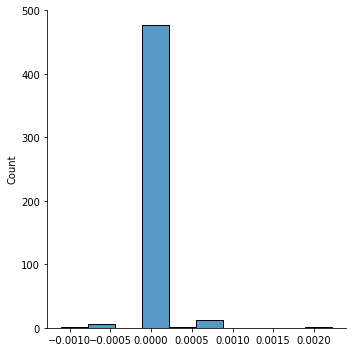

In [112]:
for i in range(0,25):
    print(f'Feature {test_data.columns[i]}')
    sns.displot(shap_values_XGB.values[:,i])
    plt.show()

## Assumptions

1. The first assumption made regarding t-tests concerns the scale of measurement. The assumption for a t-test is that the scale of measurement applied to the data collected follows a continuous or ordinal scale, such as the scores for an IQ test.
2. The second assumption made is that of a simple random sample, that the data is collected from a representative, randomly selected portion of the total population.
3. The third assumption is the data, when plotted, results in a normal distribution, bell-shaped distribution curve.
4. The final assumption is the homogeneity of variance. Homogeneous, or equal, variance exists when the standard deviations of samples are approximately equal.


1 and 2 are verified by the process we followed so far.  
We need to check 3 and 4.  
The 3rd is with a t-test, and the 4th will be done with a levene test.

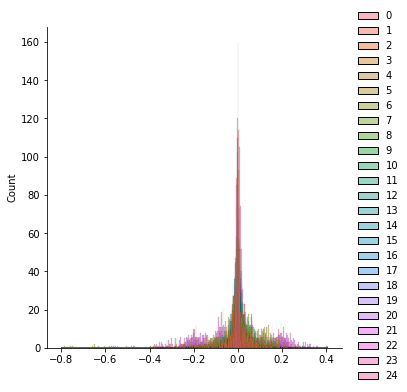

In [114]:
lista = []
for i in range(0,25):
    lista.append(shap_values_LinearSVC.values[:,i] - shap_values_XGB.values[:,i])

sns.displot(lista)

Feature Unnamed: 0
LeveneResult(statistic=0.3847152427597168, pvalue=0.5353736097940158)
We don't reject the null hypothises at 0.5353736097940158



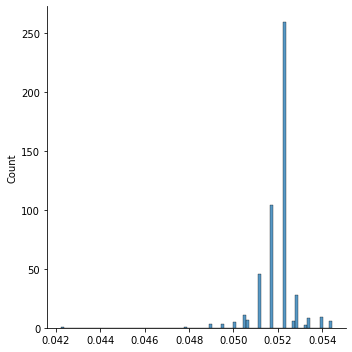



Feature Unnamed: 0.1
LeveneResult(statistic=nan, pvalue=nan)
We don't reject the null hypothises at nan



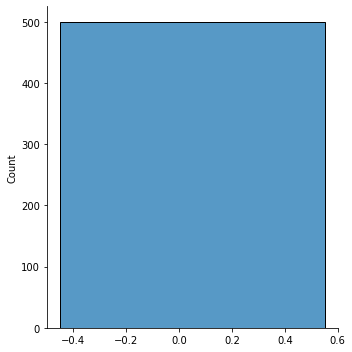



Feature Gender
LeveneResult(statistic=nan, pvalue=nan)
We don't reject the null hypothises at nan



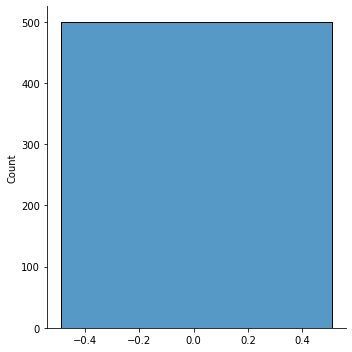



Feature Customer Type
LeveneResult(statistic=0.42326337186145246, pvalue=0.5156125957498501)
We don't reject the null hypothises at 0.5156125957498501



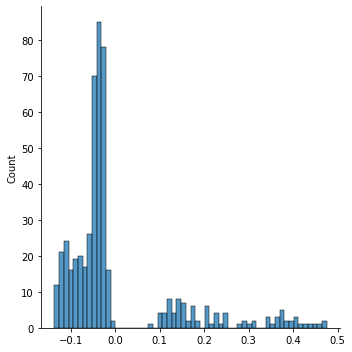



Feature Age
LeveneResult(statistic=0.4977796128599742, pvalue=0.48080659071287446)
We don't reject the null hypothises at 0.48080659071287446



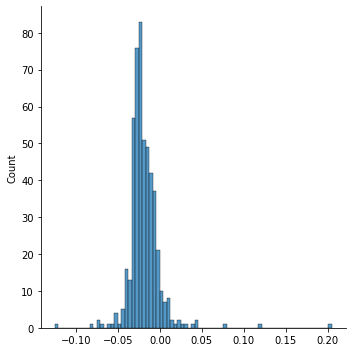



Feature Type of Travel
LeveneResult(statistic=1.2070559943644201, pvalue=0.27244576710565954)
We don't reject the null hypothises at 0.27244576710565954



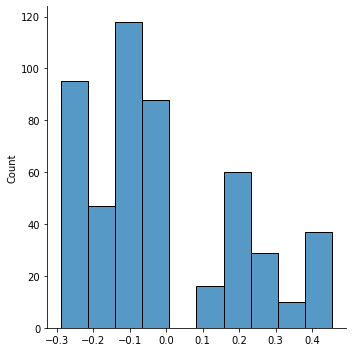



Feature Flight Distance
LeveneResult(statistic=0.24697969148449692, pvalue=0.6194287237473346)
We don't reject the null hypothises at 0.6194287237473346



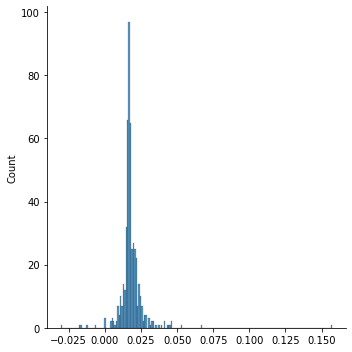



Feature Inflight wifi service
LeveneResult(statistic=0.6358319792005348, pvalue=0.4256034006366384)
We don't reject the null hypothises at 0.4256034006366384



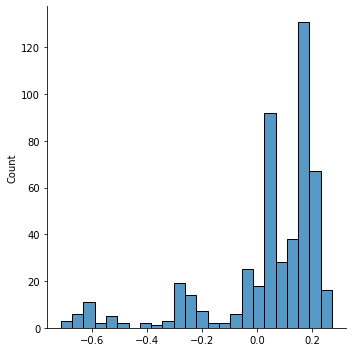



Feature Departure/Arrival time convenient
LeveneResult(statistic=1.3468973265269226, pvalue=0.24637618609394246)
We don't reject the null hypothises at 0.24637618609394246



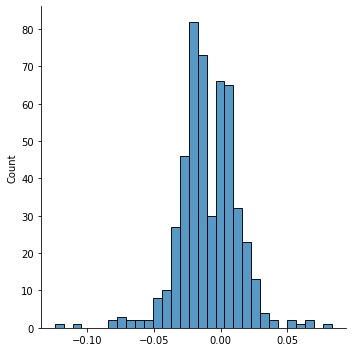



Feature Ease of Online booking
LeveneResult(statistic=0.9476101218230907, pvalue=0.33080000837341017)
We don't reject the null hypothises at 0.33080000837341017



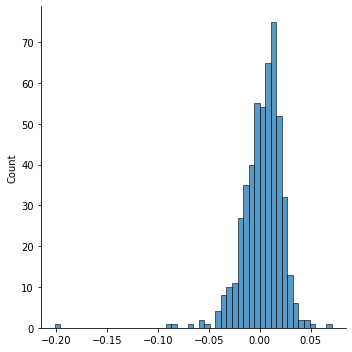



Feature Gate location
LeveneResult(statistic=0.48065624992652417, pvalue=0.4884477751842503)
We don't reject the null hypothises at 0.4884477751842503



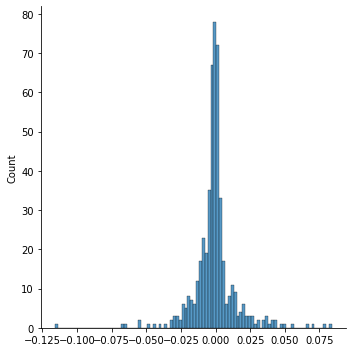



Feature Food and drink
LeveneResult(statistic=0.43254032080932203, pvalue=0.5110483381622346)
We don't reject the null hypothises at 0.5110483381622346



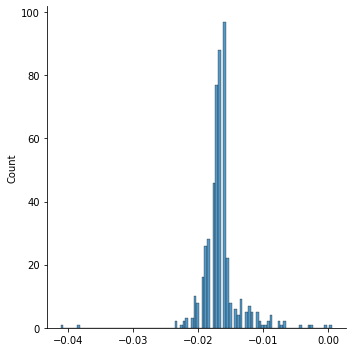



Feature Online boarding
LeveneResult(statistic=1.6406924546014272, pvalue=0.2008254752161467)
We don't reject the null hypothises at 0.2008254752161467



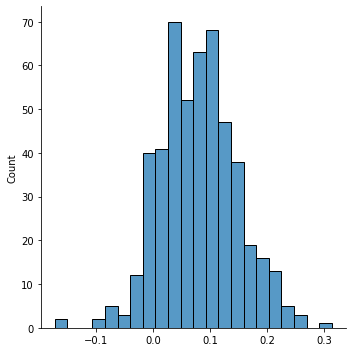



Feature Seat comfort
LeveneResult(statistic=0.715306585270875, pvalue=0.3980931304019718)
We don't reject the null hypothises at 0.3980931304019718



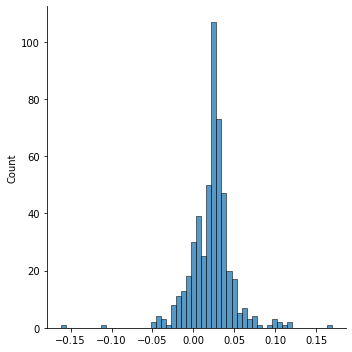



Feature Inflight entertainment
LeveneResult(statistic=0.8047525161656877, pvalue=0.3701088241729613)
We don't reject the null hypothises at 0.3701088241729613



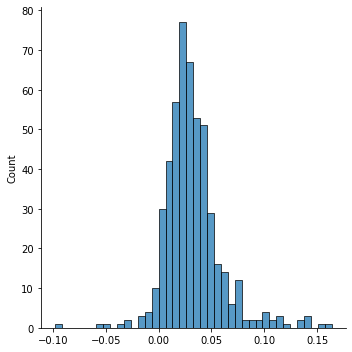



Feature On-board service
LeveneResult(statistic=1.0066380960447423, pvalue=0.3161958674833125)
We don't reject the null hypothises at 0.3161958674833125



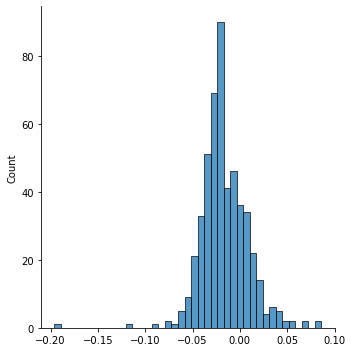



Feature Leg room service
LeveneResult(statistic=1.6501775869840032, pvalue=0.19953077823514626)
We don't reject the null hypothises at 0.19953077823514626



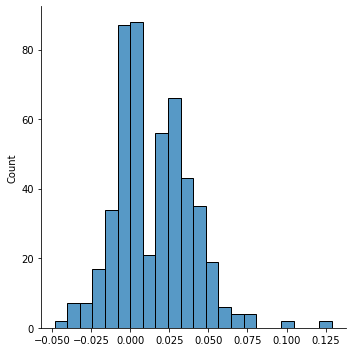



Feature Baggage handling
LeveneResult(statistic=1.1146063762533072, pvalue=0.29159368286724463)
We don't reject the null hypothises at 0.29159368286724463



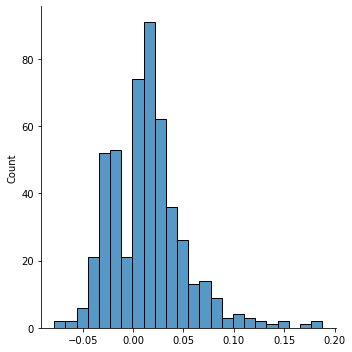



Feature Checkin service
LeveneResult(statistic=0.7296013458104115, pvalue=0.3934223065133682)
We don't reject the null hypothises at 0.3934223065133682



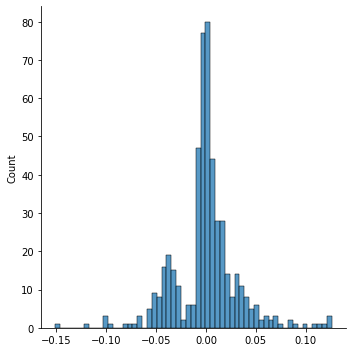



Feature Inflight service
LeveneResult(statistic=1.005506588345877, pvalue=0.31646773177206255)
We don't reject the null hypothises at 0.31646773177206255



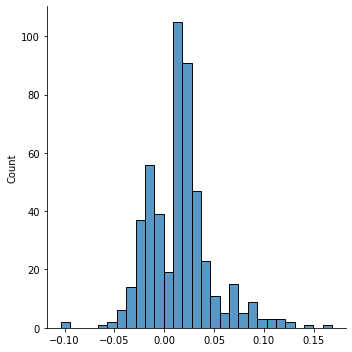



Feature Cleanliness
LeveneResult(statistic=0.8619595856838396, pvalue=0.35363975983960094)
We don't reject the null hypothises at 0.35363975983960094



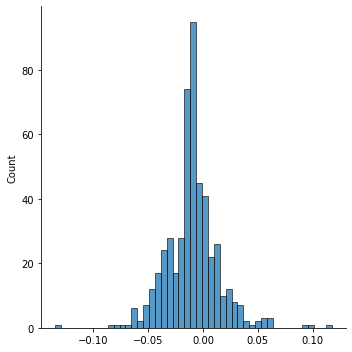



Feature Departure Delay in Minutes
LeveneResult(statistic=0.5018829925529408, pvalue=0.4790047197216748)
We don't reject the null hypothises at 0.4790047197216748



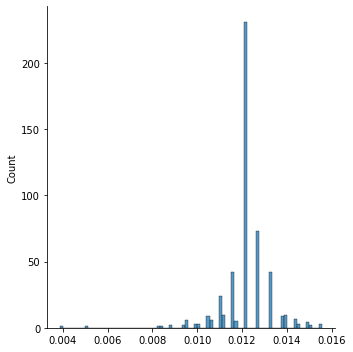



Feature Arrival Delay in Minutes
LeveneResult(statistic=0.5531518216432681, pvalue=0.45738276140798106)
We don't reject the null hypothises at 0.45738276140798106



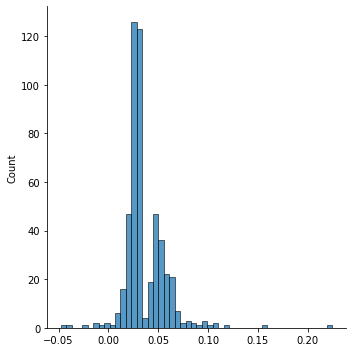



Feature Class_Sequential_Added
LeveneResult(statistic=1.9133172242283258, pvalue=0.16721379171148923)
We don't reject the null hypothises at 0.16721379171148923



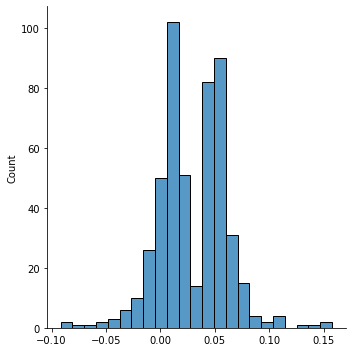



Feature Class_Business
LeveneResult(statistic=nan, pvalue=nan)
We don't reject the null hypothises at nan



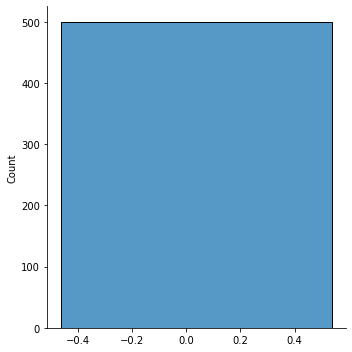



Feature Class_Eco
LeveneResult(statistic=nan, pvalue=nan)
We don't reject the null hypothises at nan



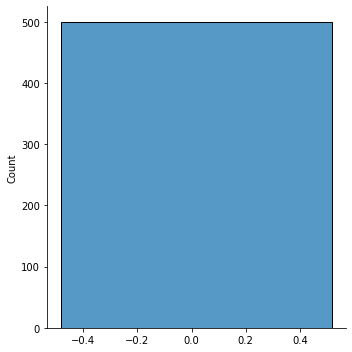



Feature Class_Eco Plus
LeveneResult(statistic=0.06588239001535988, pvalue=0.7975349613157473)
We don't reject the null hypothises at 0.7975349613157473



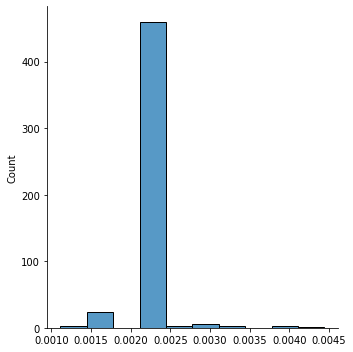

In [ ]:
for i in range(0,25):
    print(f'Feature {test_data.columns[i]}')
    sns.displot(lista[i])
    levene = stats.levene(shap_values_LinearSVC.values[:,i], shap_values_XGB.values[:,i])
    print(levene)
    print(f"We don't reject the null hypothises at {levene.pvalue}\n")
    plt.show()
    print("\n")

## T-test

In [115]:
for i in range(0, 25):
    print(f'Feature {test_data.columns[i]}')
    t_test = stats.ttest_rel(shap_values_LinearSVC.values[:,i], shap_values_XGB.values[:,i])
    print('At 5% significance, we:')
    if t_test.pvalue > 0.05:
        print(f"\treject the null hypothises at p-value {t_test.pvalue}: > 0.05\n")
    else:
        print(f"\tdon't reject the null hypothises at p-value: {t_test.pvalue}% < 0.05\n")

Feature Gender
At 5% significance, we:
	don't reject the null hypothises at p-value: 0.016933452845757983% < 0.05

Feature Customer Type
At 5% significance, we:
	don't reject the null hypothises at p-value: 0.04881576745907319% < 0.05

Feature Age
At 5% significance, we:
	don't reject the null hypothises at p-value: 0.0007004628597779134% < 0.05

Feature Type of Travel
At 5% significance, we:
	don't reject the null hypothises at p-value: 8.297364131440233e-09% < 0.05

Feature Flight Distance
At 5% significance, we:
	reject the null hypothises at p-value 0.07916420645576239: > 0.05

Feature Inflight wifi service
At 5% significance, we:
	reject the null hypothises at p-value 0.17711092880821908: > 0.05

Feature Departure/Arrival time convenient
At 5% significance, we:
	don't reject the null hypothises at p-value: 0.012924773311628448% < 0.05

Feature Ease of Online booking
At 5% significance, we:
	reject the null hypothises at p-value 0.37239021488904167: > 0.05

Feature Gate location
At

In [127]:
shap_values_LinearSVC_2 = explainer_LinearSVC(test_data_2)
shap_values_XGB_2 = explainer_XGB(test_data_2)
for i in range(0, 25):
    print(f'Feature {test_data_2.columns[i]}')
    t_test = stats.ttest_rel(shap_values_LinearSVC_2.values[:,i], shap_values_XGB_2.values[:,i])
    print('At 5% significance, we:')
    if t_test.pvalue > 0.05:
        print(f"\treject the null hypothises at p-value {t_test.pvalue}: > 0.05\n")
    else:
        print(f"\tdon't reject the null hypothises at p-value: {t_test.pvalue}% < 0.05\n")

Permutation explainer: 701it [04:20,  2.58it/s]
Permutation explainer: 701it [03:06,  3.55it/s]

Feature Gender
At 5% significance, we:
	reject the null hypothises at p-value 0.08284376477845229: > 0.05

Feature Customer Type
At 5% significance, we:
	reject the null hypothises at p-value 0.7123524592886049: > 0.05

Feature Age
At 5% significance, we:
	don't reject the null hypothises at p-value: 3.816693932977878e-05% < 0.05

Feature Type of Travel
At 5% significance, we:
	don't reject the null hypothises at p-value: 1.1830347937395954e-07% < 0.05

Feature Flight Distance
At 5% significance, we:
	don't reject the null hypothises at p-value: 0.012097137453355439% < 0.05

Feature Inflight wifi service
At 5% significance, we:
	don't reject the null hypothises at p-value: 0.00039325697019381974% < 0.05

Feature Departure/Arrival time convenient
At 5% significance, we:
	don't reject the null hypothises at p-value: 8.230445684783415e-06% < 0.05

Feature Ease of Online booking
At 5% significance, we:
	reject the null hypothises at p-value 0.2991851118747097: > 0.05

Feature Gate location

In [128]:
shap_values_LinearSVC_3 = explainer_LinearSVC(test_data_3)
shap_values_XGB_3 = explainer_XGB(test_data_3)
for i in range(0, 25):
    print(f'Feature {test_data_3.columns[i]}')
    t_test = stats.ttest_rel(shap_values_LinearSVC_3.values[:,i], shap_values_XGB_3.values[:,i])
    print('At 5% significance, we:')
    if t_test.pvalue > 0.05:
        print(f"\treject the null hypothises at p-value {t_test.pvalue}: > 0.05\n")
    else:
        print(f"\tdon't reject the null hypothises at p-value: {t_test.pvalue}% < 0.05\n")

Permutation explainer: 501it [02:44,  2.84it/s]
Permutation explainer: 501it [02:13,  3.46it/s]

Feature Gender
At 5% significance, we:
	don't reject the null hypothises at p-value: 6.777128321175503e-05% < 0.05

Feature Customer Type
At 5% significance, we:
	don't reject the null hypothises at p-value: 0.023828378274816694% < 0.05

Feature Age
At 5% significance, we:
	don't reject the null hypothises at p-value: 0.0007438812925507077% < 0.05

Feature Type of Travel
At 5% significance, we:
	don't reject the null hypothises at p-value: 1.555185347694467e-09% < 0.05

Feature Flight Distance
At 5% significance, we:
	reject the null hypothises at p-value 0.3234139405934644: > 0.05

Feature Inflight wifi service
At 5% significance, we:
	reject the null hypothises at p-value 0.3495896330665529: > 0.05

Feature Departure/Arrival time convenient
At 5% significance, we:
	don't reject the null hypothises at p-value: 0.016624326461580626% < 0.05

Feature Ease of Online booking
At 5% significance, we:
	reject the null hypothises at p-value 0.7456981728257903: > 0.05

Feature Gate location
At 

We can conclude that shap values are significantly different for some observations, and not with others. A conjecture is that they are going to be different with the whole dataset.

## One sample examples

In [116]:
test_data2 = test_data.sample(1, random_state = 123)

In [117]:
explainer_LinearSVC = shap.Explainer(SVC_model_1.predict, train_data)
shap_values_LinearSVC = explainer_LinearSVC(test_data2)

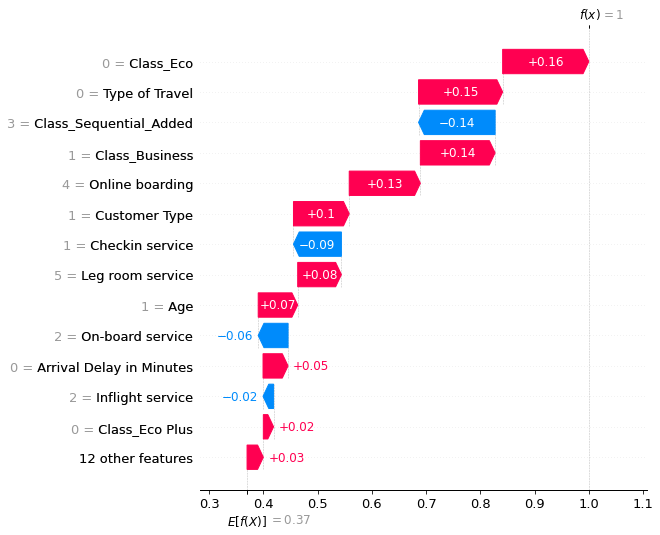

In [118]:
shap.plots.waterfall(shap_values_LinearSVC[0], max_display=14)

In [119]:
shap.initjs()
shap.force_plot(base_value=shap_values_LinearSVC[0].base_values, shap_values=shap_values_LinearSVC[0].values, feature_names=test_data.columns)

In [129]:
test_data2 = test_data.sample(1, random_state = 0)

In [130]:
explainer_LinearSVC = shap.Explainer(SVC_model_1.predict, train_data)
shap_values_LinearSVC = explainer_LinearSVC(test_data2)

In [131]:
shap.initjs()
shap.force_plot(base_value=shap_values_LinearSVC[0].base_values, shap_values=shap_values_LinearSVC[0].values, feature_names=test_data.columns)

In [132]:
test_data2 = test_data.sample(1, random_state = 44)

In [133]:
explainer_LinearSVC = shap.Explainer(SVC_model_1.predict, train_data)
shap_values_LinearSVC = explainer_LinearSVC(test_data2)

In [134]:
shap.initjs()
shap.force_plot(base_value=shap_values_LinearSVC[0].base_values, shap_values=shap_values_LinearSVC[0].values, feature_names=test_data.columns)